In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl

import sqlite3
conn = sqlite3.connect('pydatabase')

In [43]:
pd.read_sql('SELECT * FROM den_bike_stations d JOIN yelp y ON d.Station_Number JOIN foursquare f ON f.Nearest_Station = d.Station_Number', conn)

,Station_Number,Station_Name,Latitude,Longitude,Number of Bikes,Nearest_Station,Yelp_Results,Nearest_Station,Foursquare_Results
0,1,Welton St at 15th St,39.743730,-104.992260,4,65,45,1,1
1,1,Welton St at 15th St,39.743730,-104.992260,4,65,45,1,1
2,1,Welton St at 15th St,39.743730,-104.992260,4,65,45,1,1
3,1,Welton St at 15th St,39.743730,-104.992260,4,65,45,1,1
4,1,Welton St at 15th St,39.743730,-104.992260,4,65,45,1,7
...,...,...,...,...,...,...,...,...,...
65295,65,E Asbury Ave at S University Blvd,39.680309,-104.959109,0,65,45,65,4
65296,65,E Asbury Ave at S University Blvd,39.680309,-104.959109,0,65,45,65,4
65297,65,E Asbury Ave at S University Blvd,39.680309,-104.959109,0,65,45,65,4
65298,65,E Asbury Ave at S University Blvd,39.680309,-104.959109,0,65,45,65,4


In [42]:
pd.read_sql('SELECT * FROM ratings JOIN den_bike_stations ON ratings.Nearest_Station = den_bike_stations.Station_Number WHERE Station_Number == 5 ORDER BY ratings.Rating DESC LIMIT 10', conn)

,Name,Rating,Nearest_Station,Station_Number,Station_Name,Latitude,Longitude,Number of Bikes
0,la-sabrosita-denver,5.0,5.0,5,18th St at Arapahoe St,39.749654,-104.993075,0
1,20th-street-cafe-denver-4,5.0,5.0,5,18th St at Arapahoe St,39.749654,-104.993075,0
2,loris-wraps-denver,5.0,5.0,5,18th St at Arapahoe St,39.749654,-104.993075,0
3,ta-co-mucho-bueno-denver,5.0,5.0,5,18th St at Arapahoe St,39.749654,-104.993075,0
4,savoy-denver-denver,5.0,5.0,5,18th St at Arapahoe St,39.749654,-104.993075,0
5,la-sabrosita-denver,5.0,5.0,5,18th St at Arapahoe St,39.749654,-104.993075,0
6,20th-street-cafe-denver-4,5.0,5.0,5,18th St at Arapahoe St,39.749654,-104.993075,0
7,loris-wraps-denver,5.0,5.0,5,18th St at Arapahoe St,39.749654,-104.993075,0
8,ta-co-mucho-bueno-denver,5.0,5.0,5,18th St at Arapahoe St,39.749654,-104.993075,0
9,savoy-denver-denver,5.0,5.0,5,18th St at Arapahoe St,39.749654,-104.993075,0


In [44]:
all_df = pd.read_sql('SELECT * FROM den_bike_stations d JOIN yelp y ON d.Station_Number = y.Nearest_Station JOIN foursquare f ON f.Nearest_Station = d.Station_Number', conn)
all_df = all_df.drop(columns=['Nearest_Station'])

In [20]:
print(all_df.isnull().sum())

Station_Number        0
Station_Name          0
Latitude              0
Longitude             0
Number of Bikes       0
Yelp_Results          0
Foursquare_Results    0
dtype: int64


In [21]:
print(all_df.duplicated().sum())

998


C:\Users\wonga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Foursquare_Results', ylabel='Count'>

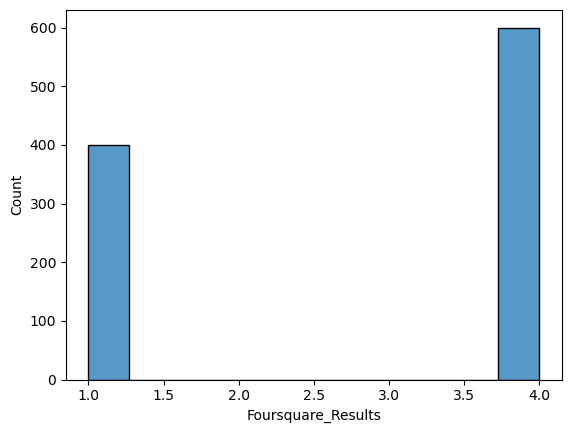

In [19]:
import seaborn as sb
import matplotlib.pyplot as mpl

sb.histplot(all_df['Foursquare_Results'])

C:\Users\wonga\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Yelp_Results', ylabel='Count'>

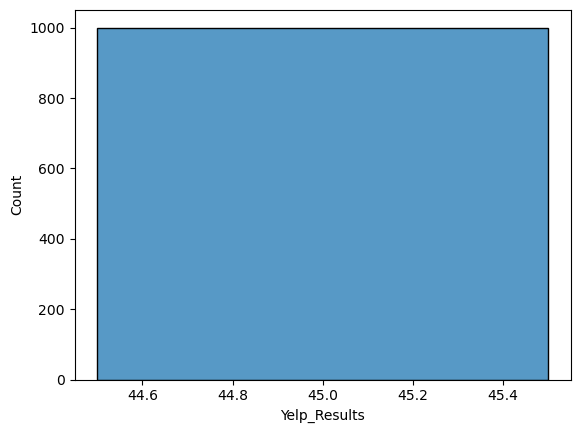

In [22]:
import seaborn as sb
import matplotlib.pyplot as mpl

sb.histplot(all_df['Yelp_Results'])

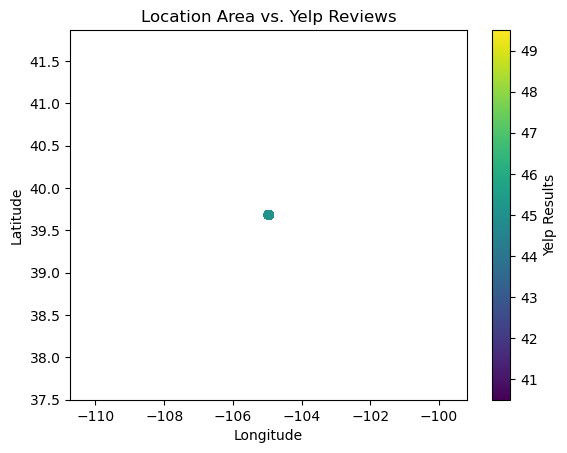

In [33]:
import seaborn as sb
import matplotlib.pyplot as mpl

mpl.scatter(x=all_df['Longitude'], y=all_df['Latitude'], c=all_df['Yelp_Results'])

mpl.xlabel('Longitude'),
mpl.ylabel('Latitude'),
mpl.title('Location Area vs. Yelp Reviews')
mpl.colorbar().set_label('Yelp Results')

In [24]:
all_df.describe(include='all')

,Station_Number,Station_Name,Latitude,Longitude,Number of Bikes,Yelp_Results,Foursquare_Results
count,1000.0,1000,1.000000e+03,1.000000e+03,1000.0,1000.0,1000.000000
unique,NaN,1,NaN,NaN,NaN,NaN,NaN
top,NaN,E Asbury Ave at S University Blvd,NaN,NaN,NaN,NaN,NaN
freq,NaN,1000,NaN,NaN,NaN,NaN,NaN
mean,65.0,NaN,3.968031e+01,-1.049591e+02,0.0,45.0,2.800000
std,0.0,NaN,1.848336e-13,1.677720e-12,0.0,0.0,1.470429
min,65.0,NaN,3.968031e+01,-1.049591e+02,0.0,45.0,1.000000
25%,65.0,NaN,3.968031e+01,-1.049591e+02,0.0,45.0,1.000000
50%,65.0,NaN,3.968031e+01,-1.049591e+02,0.0,45.0,4.000000
75%,65.0,NaN,3.968031e+01,-1.049591e+02,0.0,45.0,4.000000
